In [1]:
import os 
import glob 
import re 
import pandas as pd
import pickle
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D


In [2]:
PyOptMech = pd.read_csv("/work/kotlarcm/WORK/V2/GA/Final/Start_mpi_pop50_gen500_PyOptMECH_Case100/Loogbox_Optim_Pop50_Gen500_PyOptMECH_Case_100.csv")
PyOptMech_Ref =pd.read_pickle("/work/kotlarcm/WORK/V2/GA/Final/Start_mpi_pop50_gen500_PyOptMECH_Case100/F_ref.pkl")



/tmp/ipykernel_212241/1900653452.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


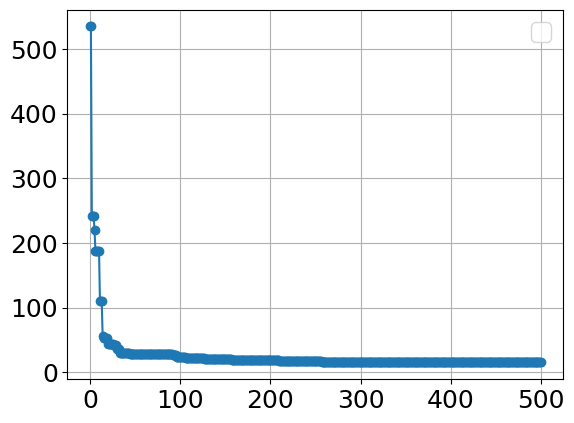

In [8]:
plt.rcParams.update({'font.size': 18}) 
plt.plot(PyOptMech["gen"],PyOptMech["min"],'-o')
plt.legend()
plt.grid()

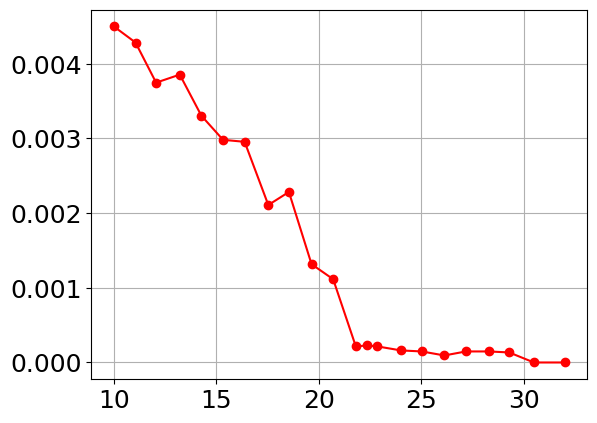

In [32]:
x_values= [103, 124, 144, 167, 188, 209, 230, 253, 273, 295, 316, 338, 349, 359, 382, 402, 424, 445, 467, 487, 511, 541]
y_values= [74, 90, 130, 122, 163, 187, 189, 252, 239, 311, 326, 393, 392, 393, 397, 398, 402, 398, 398, 399, 409, 409]

# Manually estimated axis limits from the image
x_min, x_max = 10, 32   # X-axis range from the graph
y_min, y_max = 0.000, 0.0045  # Y-axis range from the graph

# Image dimensions (from the detected points)
img_x_min, img_x_max = min(x_values), max(x_values)
img_y_min, img_y_max = min(y_values), max(y_values)

# Convert pixel coordinates to real graph coordinates
x_real = [x_min + (x - img_x_min) / (img_x_max - img_x_min) * (x_max - x_min) for x in x_values]
y_real = [y_max - (y - img_y_min) / (img_y_max - img_y_min) * (y_max - y_min) for y in y_values]

# Display the converted data
x_real, y_real

plt.rcParams.update({'font.size': 18}) 
plt.plot(x_real,y_real,'-or')
plt.grid()


In [21]:
PyOptMech_100 = pd.read_csv("/work/kotlarcm/WORK/V2/GA/Final/Start_mpi_pop50_gen500_PyOptMECH_Case100/Loogbox_Optim_Pop50_Gen500_PyOptMECH_Case_100.csv")
PyOptMech_Ref_100 =pd.read_pickle("/work/kotlarcm/WORK/V2/GA/Final/Start_mpi_pop50_gen500_PyOptMECH_Case100/F_ref.pkl")

PyOptMech_50_start = pd.read_csv("/work/kotlarcm/WORK/V2/GA/Final/Start_mpi_pop50_gen500_PyOptMECH_Case50/hist/Output_mpi_gen27.csv")
PyOptMech_50 = pd.read_csv("/work/kotlarcm/WORK/V2/GA/Final/Restart_mpi_pop50_gen500_PyOptMECH_Case50/Loogbox_Optim_Pop50_Gen500_PyOptMECH_Case_50.csv")
PyOptMech_Ref_50 =pd.read_pickle("/work/kotlarcm/WORK/V2/GA/Final/Restart_mpi_pop50_gen500_PyOptMECH_Case50/F_ref.pkl")


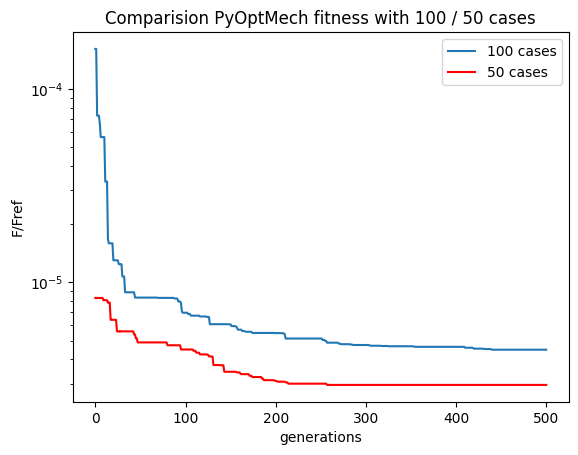

In [24]:
plt.plot(PyOptMech_100["gen"],PyOptMech_100["min"]/PyOptMech_Ref_100[0],label="100 cases")
plt.plot(PyOptMech_50["gen"],PyOptMech_50["min"]/PyOptMech_Ref_50[0],'-r',label="50 cases")
plt.plot(PyOptMech_50_start["gen"],PyOptMech_50_start["min"]/PyOptMech_Ref_50[0],'-r')
plt.legend()
plt.xlabel("generations")
plt.ylabel("F/Fref")
plt.title("Comparision PyOptMech fitness with 100 / 50 cases")
plt.yscale("log")

In [20]:
PyOptMech_50["min"].iloc[-1]/PyOptMech_Ref_50[0]

np.float64(2.954648384015245e-06)

In [18]:
PyOptMech_100["min"].iloc[-1]/PyOptMech_Ref_100[0]

np.float64(4.492494627381224e-06)